<a href="https://colab.research.google.com/github/raimediaz/An-lise-dos-Dados-do-Airbnb---Cidades-Latino-americanas/blob/main/An%C3%A1lise_Ciudad_de_M%C3%A9xico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Análise dos Dados do Airbnb - Cidade do México

O **[Airbnb](https://www.airbnb.com.br/)**, é uma plataforma de aluguel de hospedagens, que permite que qualquer pessoa disponibilize ou reserve acomodações ao redor do mundo.

No final de 2019 [Airbnb](https://www.airbnb.com.br/) já havia **hospedado mais de 500 milhões** de pessoas ao redor do mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível obter uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.
_____________________________________________________

**A Cidade do México** (doravante CDMX) é uma das principais metrópoles da América Latina, com aproximadamente 9.2 milhões de habitantes (e mais de 20 milhões na zona metropolitana), segundo o último censo de 2020.

Apesar da crise sanitária provocada pela COVID-19, em 2020 CDMX recebeu aproximadamente 1.2 milhões de visitantes (65% menos do que em 2019), uma quantidade nada desprezível considerando a crise pandêmica.


**Neste *notebook*, desenvolveremos uma breve análise exploratoria dos dados referentes à CDMX, disponíves no Inside Airbnb.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios para análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/mexico/df/mexico-city/2021-07-18/visualisations/listings.csv")

## Análise exploratória dos Dados
O objetivo desta etapa é compreender, *a priori*, a estrutura geral dos dados.


Para facilitar a análise, segue um **Dicionário das variáveis**.

**id** é o identificador do imóvel.

**name** é o nome da propriedade.

**host_id** número para identificar o anfitrião.

**host_name** corresponde ao nome do anfitrião.

**neighbourhood** é o nome do bairro (ou "*delegação*" como é comumente denominado na CDMX).

**neighbourhood_group** grupo do bairro.

**latitude** é a coordenada de latitude do imóvel.

**longitude** é a coordenada de longitude do imóvel.

**room_type** mostra o tipo de quarto oferecido.

**price** é o preço de aluguel.

**minimum_nights** é a quantidade mínima de noites para reserva.

**number_of_reviews** mostra a quantidade de reviews do imóvel.

**last_review** é a data do último review.

**reviews_per_month** conta os reviews mensais.

**calculated_host_listings_count** mostra a quantidade de imóveis do mesmo anfitrião.

**availability_365** conta os dias disponíveis no intervalo de 365 dias.

Antes das perguntas analíticas, vamos realizar um *preview* dos dados visualizando as primeiras 5 entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,3979,1,0,NaN,NaN,1,363
1,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,13000,1,49,2020-03-03,5.27,10,355
2,56074,Great space in historical San Rafael,265650,Maris,NaN,Cuauhtémoc,19.43977,-99.15605,Entire home/apt,379,2,58,2019-02-21,0.50,2,311
3,58955,Entire beautiful duplex in la Roma,282620,Laura,NaN,Cuauhtémoc,19.42113,-99.15955,Entire home/apt,1532,7,42,2020-01-31,0.85,1,171
4,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,NaN,Cuauhtémoc,19.41083,-99.18057,Private room,1194,2,52,2019-02-26,1.20,2,180


Podemos observar que a variável **neighbourhood_group** parece estar com dados faltantes. Para verificar a situação podemos visualizar os valores únicos.

In [ ]:
#Verificar os valores únicos
df.neighbourhood_group.unique()

array([nan])

De fato, a variável **neighbourhood_group** deve ser desconsiderada. A CDMX não conta com essa divisão específica, como em outros países do mundo.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos de variáveis?**

O arquivo que importamos possui **18665 registros** e **16 variáveis**. Note-se que o "listings.csv" é uma versão "resumida" dos dados do Airbnb, ideal para visualizações. A versão completa "listings.csv.gz" que possui todas as variáveis (74 em total) também está disponível no portal Inside Airbnb.


In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar atributos do nosso dataset
display(df.dtypes)

Entradas:	 18665
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.245861
last_review                       0.245861
host_name                         0.000696
name                              0.000161
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Podemos observar que a variável **neighbourhood_group** possui 100% dos seus valores ausentes.

As variáveis **reviews_per_month** e **last_review** apresentam aproximadamente 25% dos seus valores ausentes.

O resto das variáveis têm menos de 1% dos seus valores ausentes. 

### **Q3. Qual o tipo de distribuição das variáveis?** 

Esse tipo de análise é importante para observar, *a priori*, os possíveis *outliers* mediante histogramas com a distribuição das variáveis.

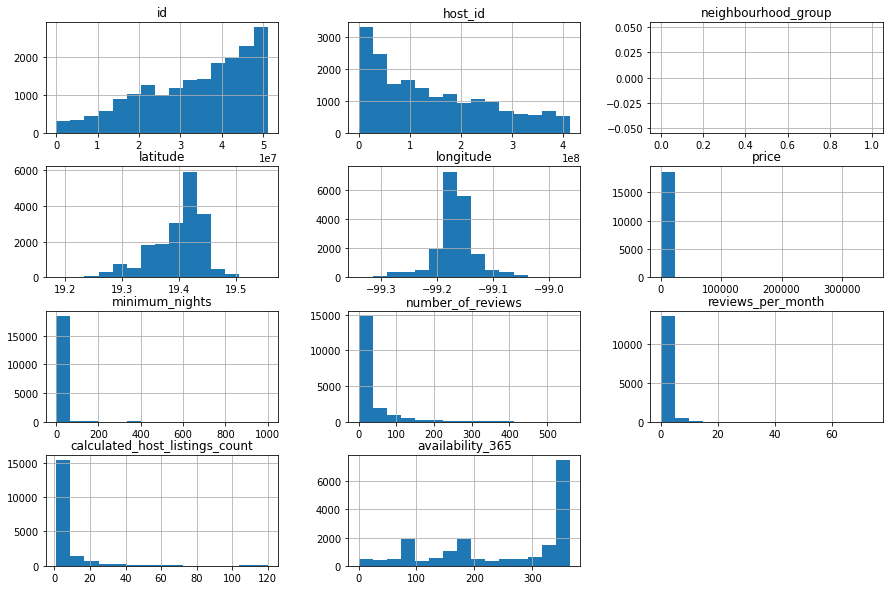

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis **price**, **minimum_nights** e **calculated_host_listings_count**.

Vamos reforçar essa análise mediante o uso do resumo estatístico ("*summarize*") da variável, pelo método describe. Também plotaremos boxplots para auxiliar. 

In [ ]:
# ver o "summarize" ou resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'calculated_host_listings_count']].describe()

,price,minimum_nights,calculated_host_listings_count
count,18665.000000,18665.000000,18665.000000
mean,1198.019877,4.701634,7.097616
std,4065.048983,22.305469,15.690043
min,0.000000,1.000000,1.000000
25%,400.000000,1.000000,1.000000
50%,706.000000,2.000000,2.000000
75%,1200.000000,3.000000,6.000000
max,350000.000000,1000.000000,120.000000


No resultado do "*summarize*", podemos destacar:


*   Na variável **price** o valor máximo de **MXN 350.000** (apróx. BRL 92.419,00) já configura uma distorção (que pode afetar o desvío padrão), considerando que o 75% da amostra encontra-se abaixo de **MXN$ 1200**.

*   Na variável **minimum_nights** temos um valor máximo de 1000 noites (a variável deveria ser menor ou igual do que 365 dias). Nesse caso o valor é outlier, considerando que o 75% dos valores da variável é menor ou igual do que 3 noites.

* O valor máximo da variável  **calculated_host_listings_count** também se encontra bastante acima da média, considerando que o 75% dos valores é igual ou menor do que 6 propriedades por anfitrião.



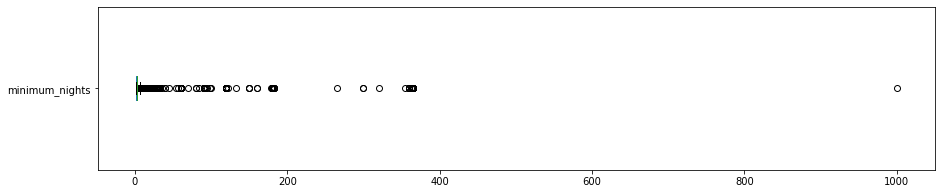

minimum_nights: valores acima de 30:
216 entradas
1.1572%


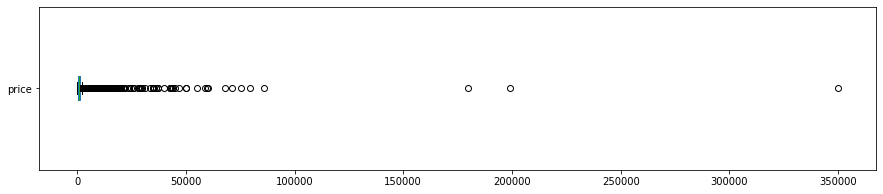


price: valores acima de MXN$ 15000
74 entradas
0.3965%


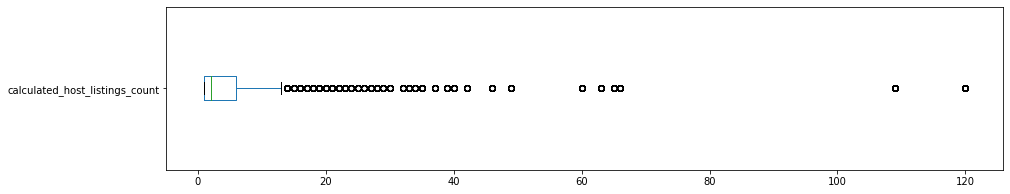


price: valores acima de 70
229 entradas
1.2269%


In [ ]:
# Boxplot para minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


# Boxplot para price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 15000 para price
print("\nprice: valores acima de MXN$ 15000")
print("{} entradas".format(len(df[df.price > 15000])))
print("{:.4f}%".format((len(df[df.price > 15000]) / df.shape[0])*100))

# Boxplot para calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 70 para calculated_host_listings_count
print("\nprice: valores acima de 70")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 70])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 70]) / df.shape[0])*100))

,price,minimum_nights,calculated_host_listings_count
count,18154.000000,18154.000000,18154.000000
mean,1030.579982,2.871709,5.802578
std,1140.090869,4.702182,10.197095
min,0.000000,1.000000,1.000000
25%,400.000000,1.000000,1.000000
50%,700.000000,2.000000,2.000000
75%,1200.000000,2.000000,5.000000
max,15000.000000,30.000000,66.000000


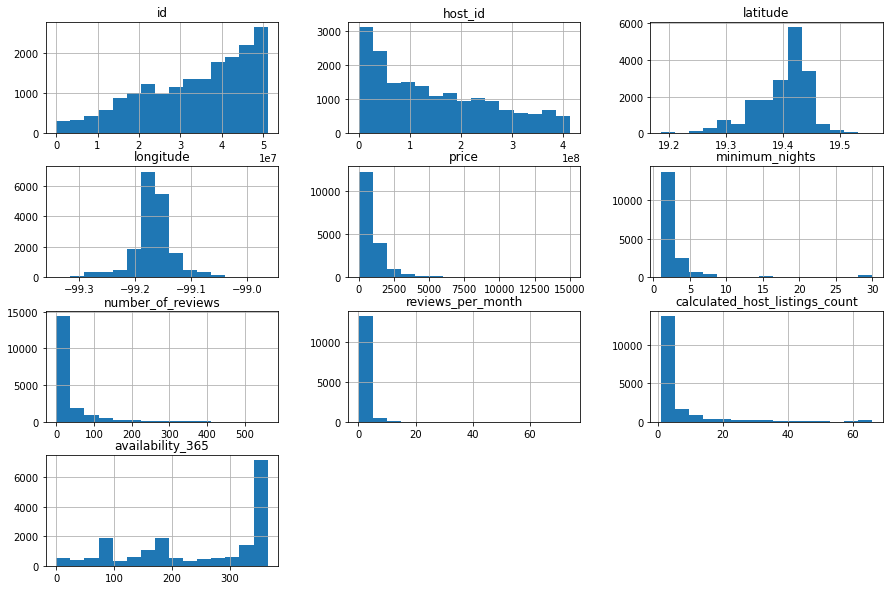

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 15000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 70].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

# descrever variáveis do dataframe limpo
df_clean[['price', 'minimum_nights', 'calculated_host_listings_count']].describe()

Foram limpados os principais *outliers* nas variáveis **price**,	**minimum_nights**	e **calculated_host_listings_count** e localizados em um novo dataframe. O maior ajuste observado foi no desvío padrão da variável **price** que foi reduzido em um 70%. 
Desta forma, os dados parecem melhor calibrados.

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da variável prince
df_clean.price.mean()

1030.5799823730308

A média para alugar um imóvel via Airbnb na Cidade do México é de apróx. **MXN $ 1030.57** (USD 52 / BRL 272).

### **Q5. Existe correlação entre as variáveis?**

In [ ]:
# criar uma matriz de correlação
correlation = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(correlation)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.003587,-0.002440,0.022048,0.119342,0.011217
minimum_nights,-0.003587,1.000000,-0.087887,-0.110001,-0.006420,-0.008782
number_of_reviews,-0.002440,-0.087887,1.000000,0.541885,0.039742,-0.040454
reviews_per_month,0.022048,-0.110001,0.541885,1.000000,0.103445,0.010023
calculated_host_listings_count,0.119342,-0.006420,0.039742,0.103445,1.000000,0.049214
availability_365,0.011217,-0.008782,-0.040454,0.010023,0.049214,1.000000


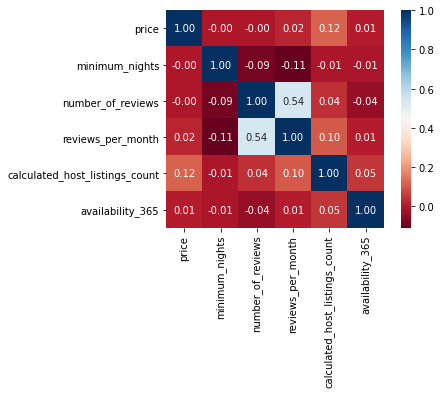

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlation, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Desconsiderando **number_of_reviews** e **reviews_per_month**, não há correlações importantes entre as variáveis numéricas que permitam analisar inferências estatísticas.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável **room_type** mostra o tipo de imóvel disponível no Airbnb.

Específicamente, na Cidade do México a maioria de imóveis disponível para alugar são *apartamentos ou casas inteiras* (52%) e *Quartos privados* (41%).

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9846
Private room       7786
Shared room         310
Hotel room          212
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]*100

Entire home/apt    52.751138
Private room       41.714439
Shared room         1.660863
Hotel room          1.135816
Name: room_type, dtype: float64

### **Q7. Quais os lugares mais caros de CDMX no Airbnb?**

Segundo a [BBC](https://www.bbc.com/portuguese/vert-tra-45134519), **Milpa Alta** é uma das 16 demarcações ou delegações territoriais da CDMX, e talvez a mais verde e menos povoada. Se observamos os dados do Aribnb, a zona possui somente 19 opções de hospedagem. Por tal razão, não será considerada como a zona mais cara de CDMX, pois o preço pode esta um pouco distorcido.

O segundo resultado, que mostra **Miguel Hidalgo** e **Cuajimalpa de Morelos** como as zonas mais caras de CDMX, parece fazer mais sentido por duas razões: **1**- uma maior quantidade de imóveis disponíveis para alugar (o que reduz a distorção no cáculo da média do preço); e, **2**- uma pesquisa publicada no site da [Forbes](https://www.forbes.com.mx/las-delegaciones-mas-caras-para-rentar-departamento/) que mostra a mesma tendência encontrada na análise.

Sendo assim, podemos concluir que em média, **Miguel Hidalgo** e **Cuajimalpa de Morelos** são as zonas mais caras da CDMX. 



In [ ]:
# ver preços por bairros, na média
print (df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False))

# ver quantidade de imóveis em Milpa Alta, Miguel Hidalgo, Cuajimalpa de Morelos
print('\nQuantidade de imóveis em Milpa Alta: {}'.format(df_clean[df_clean.neighbourhood == "Milpa Alta"].shape[0]))
print('\nQuantidade de imóveis em Miguel Hidalgo: {}'.format(df_clean[df_clean.neighbourhood == "Miguel Hidalgo"].shape[0]))
print('\nQuantidade de imóveis em Cuajimalpa de Morelos: {}'.format(df_clean[df_clean.neighbourhood == "Cuajimalpa de Morelos"].shape[0]))
print('\nQuantidade de imóveis em Cuauhtémoc : {}'.format(df_clean[df_clean.neighbourhood == "Cuauhtémoc"].shape[0]))
print('\nQuantidade de imóveis em Xochimilco : {}'.format(df_clean[df_clean.neighbourhood == "Xochimilco"].shape[0]))

neighbourhood
Milpa Alta                1525.578947
Miguel Hidalgo            1414.535457
Cuajimalpa de Morelos     1285.278017
Cuauhtémoc                1131.724203
Xochimilco                1095.503817
Álvaro Obregón             950.585443
Coyoacán                   803.717152
Benito Juárez              803.545323
La Magdalena Contreras     794.741497
Tlalpan                    782.917313
Iztacalco                  642.852814
Gustavo A. Madero          620.642651
Venustiano Carranza        594.320455
Azcapotzalco               565.238532
Iztapalapa                 557.824176
Tláhuac                    490.125000
Name: price, dtype: float64

Quantidade de imóveis em Milpa Alta: 19

Quantidade de imóveis em Miguel Hidalgo: 2919

Quantidade de imóveis em Cuajimalpa de Morelos: 464

Quantidade de imóveis em Cuauhtémoc : 6900

Quantidade de imóveis em Xochimilco : 131


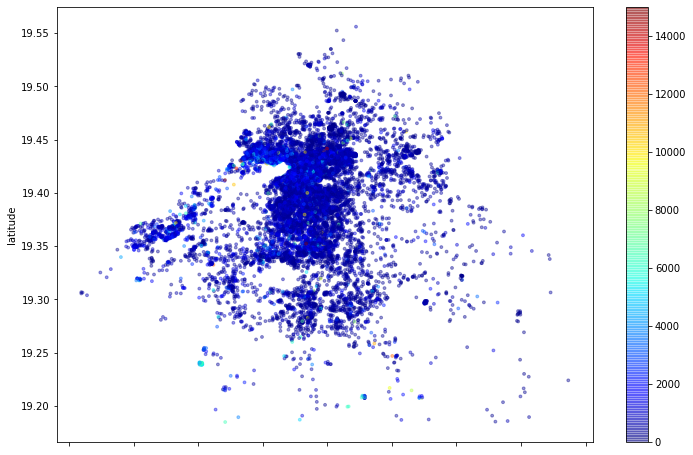

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Conforme a nossa estimação, a média do mínimo de noites para alugar no Airbnb na CDMX é de 2.87 ou seja aproxidamente **3 noites**.

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.871708714332929

## Conclusões


Realizamos uma análise exploratória dos dados de Airbnb para a Cidade do México.

* Descobrimos que o dataset possuía algumas variáveis com valores faltantes (*missings data*), e que também contava com observações *outliers* que poderiam distorcer os resultados da análise. Em vista disso, o *dataframe* foi limpado e calibrado, eliminando as observações sem afetar a qualidade da base.

* Observamos que a média para alugar um imóvel via Airbnb em CDMX é de apróx. **MXN $ 1030.57** (USD 52 / BRL 272).

* Entre outras coisas, observamos que, em média, **Miguel Hidalgo** e **Cuajimalpa de Morelos** são as zonas mais caras para alugar no Airbnb em CDMX.

Esta análise, de caráter exploratória e incial, pode ser aprofundada utilizando o dataset completo para CDMX disponível no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).